In [1]:
# Imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
# River Imports
from river import feature_extraction,metrics, compose, stats, anomaly, stream, preprocessing, linear_model, optim, tree, ensemble, cluster, neural_net, imblearn, multiclass, base, datasets, utils

Visualizations

In [2]:
from river import metrics
from river import utils
import matplotlib.pyplot as plt

# Function to evaluate the model with learning on the test set
def evaluate_model_learn_test(model,xlims=85000): 

    metric =metrics.Accuracy()
    num = 0
    obs = []
    accuracies = []
    # Train the model
    for x, y in stream.iter_pandas(X_train, y_train):

        y_pred = model.predict_one(x)
        model.learn_one(x, y)
        metric.update(y, y_pred)
    print(f'Training {metric}')
    
    # Test on validation set
    metric = metrics.Accuracy() # Reset the metric

    for x,y in stream.iter_pandas(X_test, y_test):
        num += 1
        y_pred = model.predict_one(x)
        model.learn_one(x, y)
        metric.update(y, y_pred)

        # Store the true value and the prediction
        obs.append(num)
        #print(metric.get())
        accuracies.append((metric.get()))
    print(f'Final accuracy with learning on test set: {metric}')

    # Plot the results
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.grid(alpha=0.75)
    ax.plot(obs, accuracies, lw=3, color='#CFB991', alpha=0.8, label='Accuracy')
    ax.set(xlim = (0,xlims))
    ax.legend()
    ax.set_title(f'Final accuracy with learning on test set: {metric}')

# Function to evaluate the model with no learning on the test set
def evaluate_model_no_learn_test(model,xlims=85000): 

    metric =metrics.Accuracy()
    num = 0
    obs = []
    accuracies = []
    # Train the model
    for x, y in stream.iter_pandas(X_train, y_train):

        y_pred = model.predict_one(x)
        model.learn_one(x, y)
        metric.update(y, y_pred)
    print(f'Training {metric}')
    
    # Test on validation set
    metric = metrics.Accuracy() # Reset the metric

    for x,y in stream.iter_pandas(X_test, y_test):
        num += 1
        y_pred = model.predict_one(x)
        #model.learn_one(x, y)
        metric.update(y, y_pred)

        # Store the true value and the prediction
        obs.append(num)
        #print(metric.get())
        accuracies.append((metric.get()))
    print(f'Final accuracy with learning on test set: {metric}')

    # Plot the results
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.grid(alpha=0.75)
    ax.plot(obs, accuracies, lw=3, color='#CFB991', alpha=0.8, label='Accuracy')
    ax.set(xlim = (0,xlims))
    ax.legend()
    ax.set_title(f'Final accuracy with no learning on test set: {metric}')

 Combined Data Sets

In [3]:
# Data Files

train_set = pd.read_csv("UNSW_NB15_training-set.csv")
test_set = pd.read_csv("UNSW_NB15_testing-set.csv")

df = pd.concat([train_set, test_set])
df = df.drop(columns=['proto','service','state','attack_cat','id'])

y = df.pop('label')

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.3)

X_train.head()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
134709,0.000006,2,0,114,0,166666.660800,254,0,7.600000e+07,0.000000,...,16,16,16,29,0,0,0,16,29,0
76799,1.098936,8,12,364,9136,17.289451,62,252,2.322246e+03,60968.066410,...,2,1,1,2,0,0,0,2,1,0
58900,0.484843,10,8,796,1262,35.062898,62,252,1.183063e+04,18232.707030,...,2,2,1,5,0,0,1,2,5,0
42633,0.000003,2,0,274,0,333333.321500,254,0,3.653333e+08,0.000000,...,14,14,1,38,0,0,0,15,38,0
116842,0.209620,10,6,534,268,71.558058,254,252,1.835703e+04,8548.802734,...,3,3,2,9,0,0,0,3,9,0


Logistic Regression

c:\Users\gregg\AppData\Local\Programs\Python\Python311\Lib\site-packages\river\preprocessing\scale.py:31: RuntimeWarning: invalid value encountered in double_scalars
  return a / b if b else 0.0


Training Accuracy: 84.52%
Final accuracy with learning on test set: Accuracy: 86.02%
Training Accuracy: 86.11%
Final accuracy with learning on test set: Accuracy: 85.89%


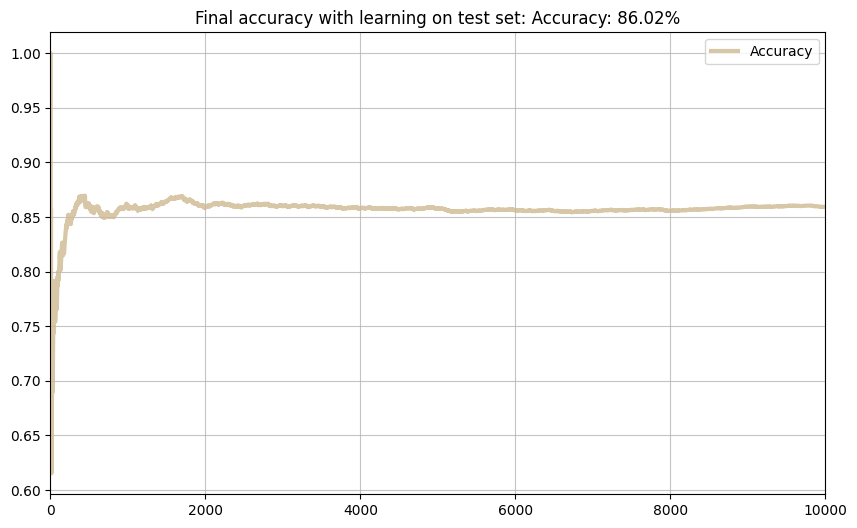

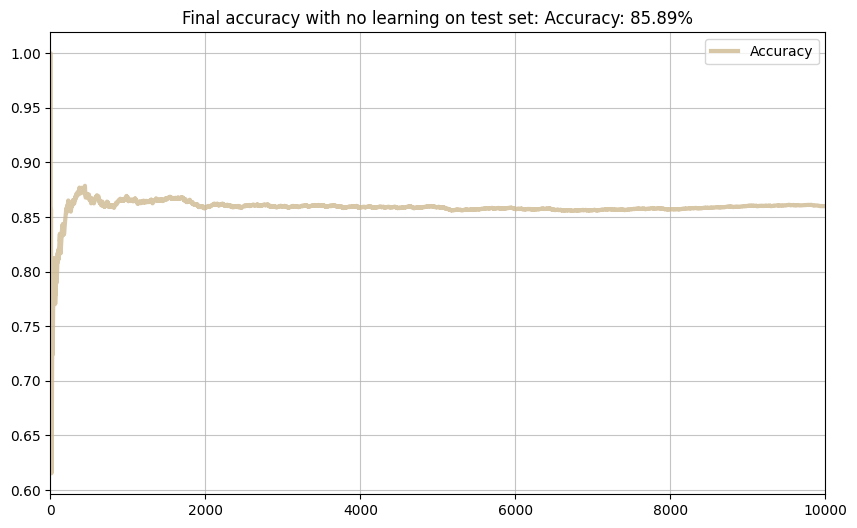

In [4]:
# Model with learning on test set
# Initialize Model pipeline
model = compose.Pipeline(
    preprocessing.MinMaxScaler(),
    linear_model.LogisticRegression()
)

evaluate_model_learn_test(model,10000)
evaluate_model_no_learn_test(model,10000)

Ensemble Bagging Classifier

Training Accuracy: 87.57%
Final accuracy with learning on test set: Accuracy: 88.08%
Training Accuracy: 88.14%
Final accuracy with learning on test set: Accuracy: 88.13%


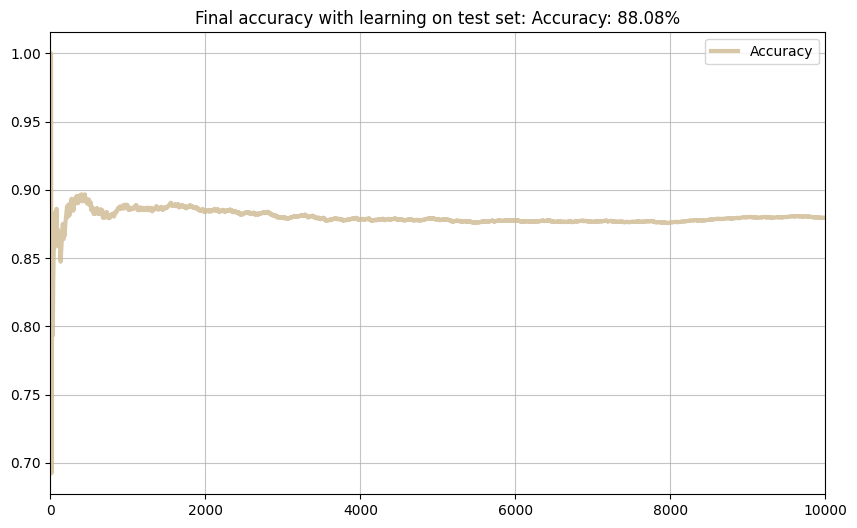

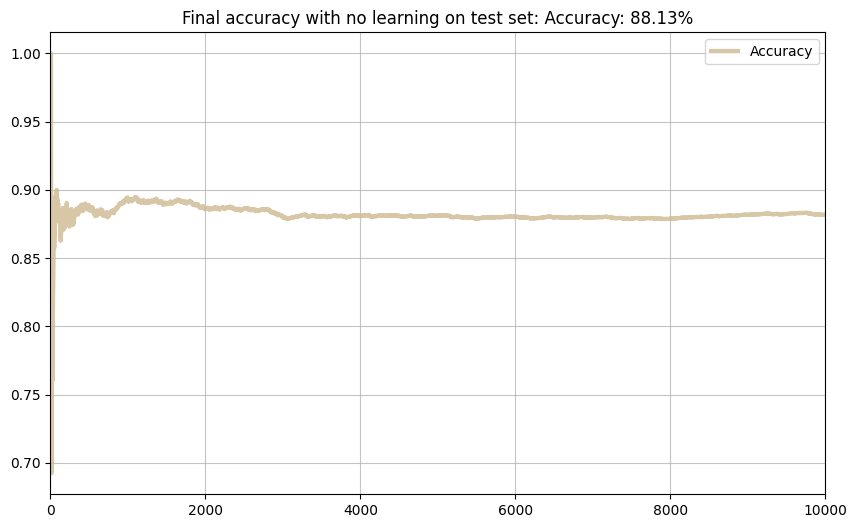

In [5]:
# Model with learning on testing set
# Initialize Model pipeline
model = ensemble.BaggingClassifier(
    model=(
        preprocessing.StandardScaler() |
        linear_model.LogisticRegression()
    ),
    n_models=3,
    seed=42
)
evaluate_model_learn_test(model,10000)
evaluate_model_no_learn_test(model,10000)

Ensemble ADWIN Bagging Classifier

Training Accuracy: 86.83%
Final accuracy with learning on test set: Accuracy: 87.09%
Training Accuracy: 87.33%
Final accuracy with learning on test set: Accuracy: 87.44%


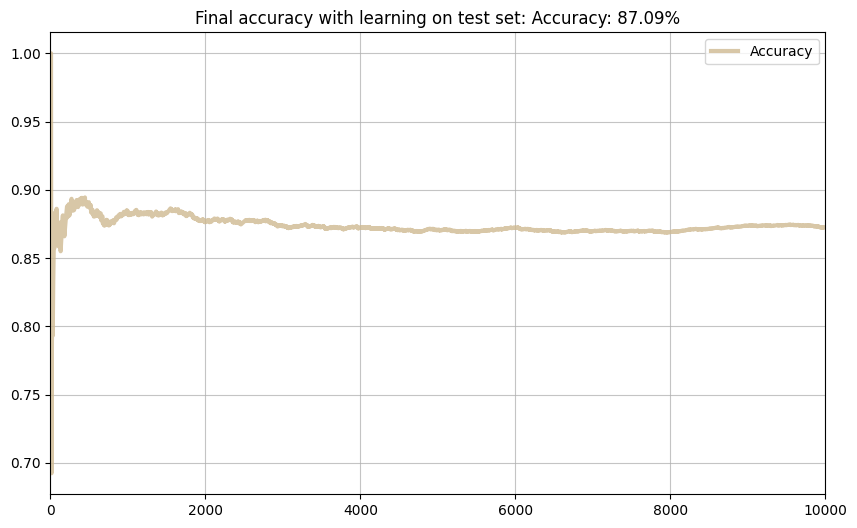

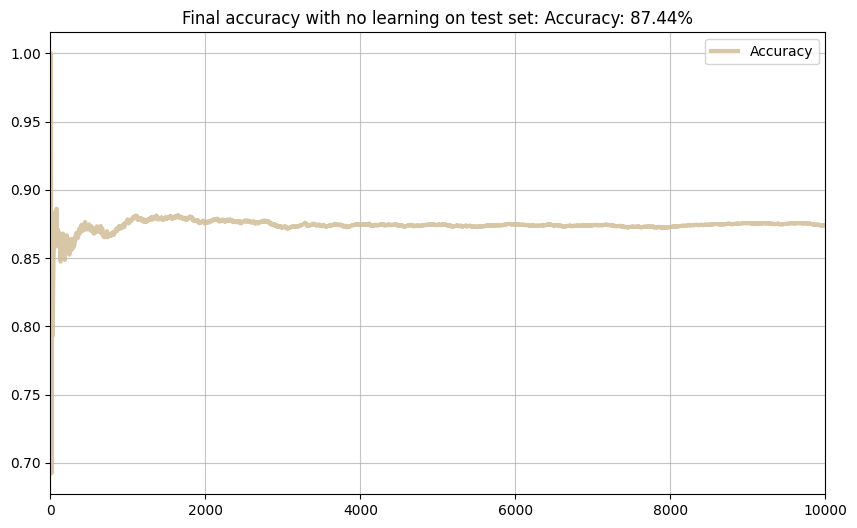

In [6]:
model = ensemble.ADWINBaggingClassifier(
    model=(
        preprocessing.StandardScaler() |
        linear_model.LogisticRegression()
    ),
    n_models=3,
    seed=42
)

evaluate_model_learn_test(model,10000)
evaluate_model_no_learn_test(model,10000)

Uncombined Data Sets

In [7]:
# Binary Classification
train_df = pd.read_csv("UNSW_NB15_training-set.csv")
test_df = pd.read_csv("UNSW_NB15_testing-set.csv")

X_train = train_df.drop(columns=['proto','service','state','attack_cat','id'])
X_test = test_df.drop(columns=['proto','service','state','attack_cat','id'])

y_train = X_train.pop("label")
y_test = X_test.pop("label")

Logistic Regression

c:\Users\gregg\AppData\Local\Programs\Python\Python311\Lib\site-packages\river\preprocessing\scale.py:31: RuntimeWarning: invalid value encountered in double_scalars
  return a / b if b else 0.0


Training Accuracy: 96.62%
Final accuracy with learning on test set: Accuracy: 98.63%
Training Accuracy: 96.94%
Final accuracy with learning on test set: Accuracy: 56.09%


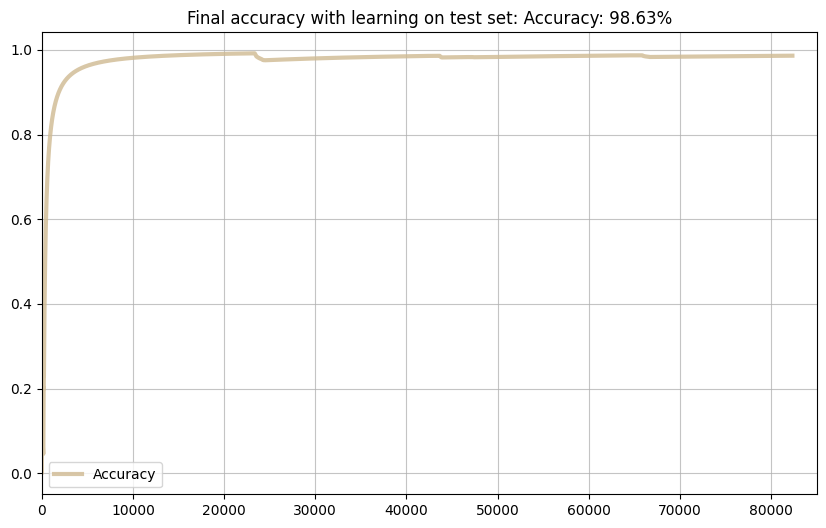

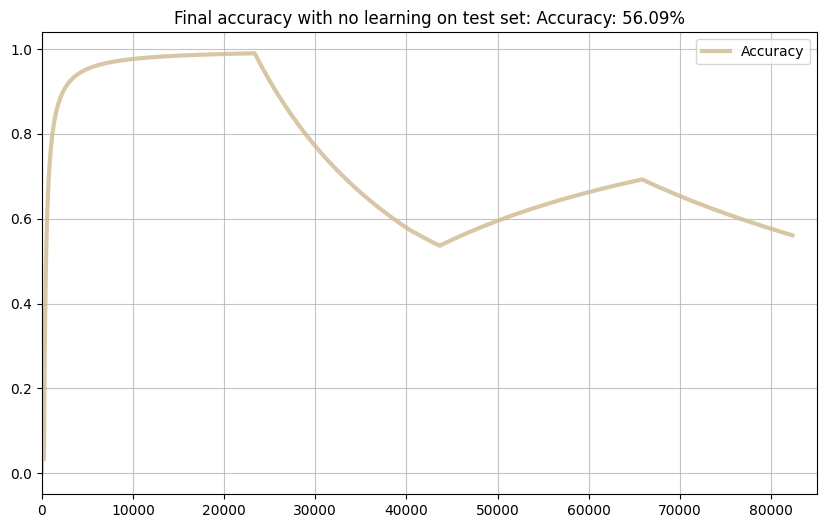

In [8]:
# Model with learning on test set
# Initialize Model pipeline
model = compose.Pipeline(
    preprocessing.MinMaxScaler(),
    linear_model.LogisticRegression()
)

evaluate_model_learn_test(model)
evaluate_model_no_learn_test(model)

Ensemble Bagging Classifier

Training Accuracy: 97.92%
Final accuracy with learning on test set: Accuracy: 99.01%
Training Accuracy: 97.75%
Final accuracy with learning on test set: Accuracy: 73.06%


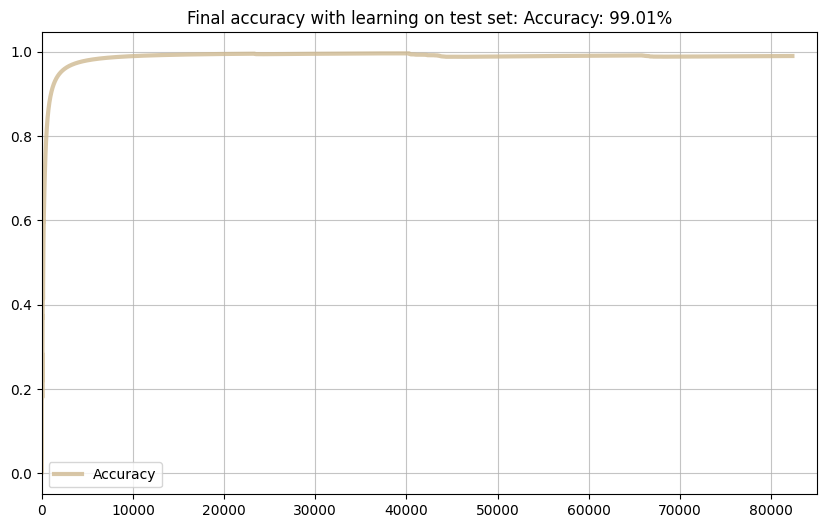

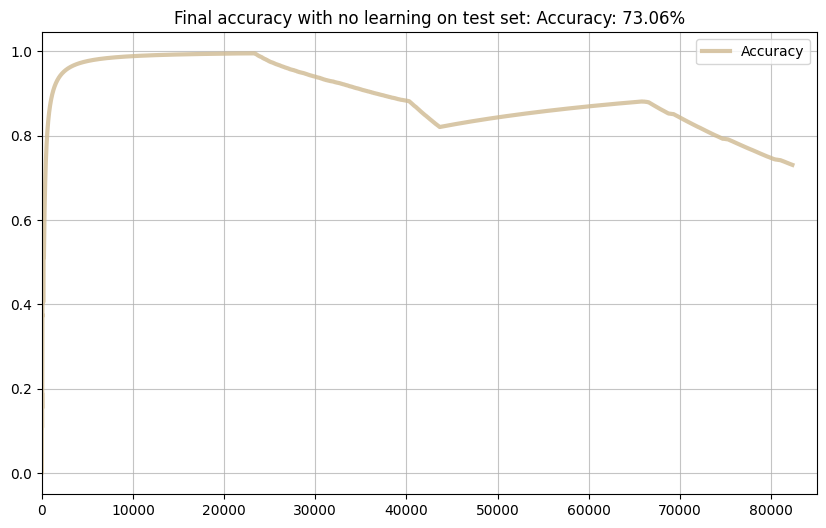

In [9]:
# Model with learning on testing set
# Initialize Model pipeline
model = ensemble.BaggingClassifier(
    model=(
        preprocessing.StandardScaler() |
        linear_model.LogisticRegression()
    ),
    n_models=3,
    seed=42
)
evaluate_model_learn_test(model)
evaluate_model_no_learn_test(model)

Ensembe ADWIN Bagging Classifier

Training Accuracy: 98.07%
Final accuracy with learning on test set: Accuracy: 99.41%
Training Accuracy: 98.07%
Final accuracy with learning on test set: Accuracy: 59.25%


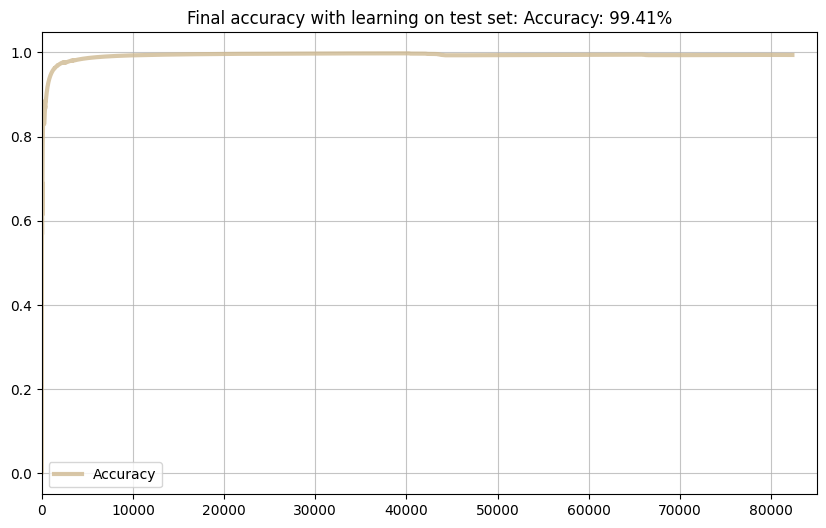

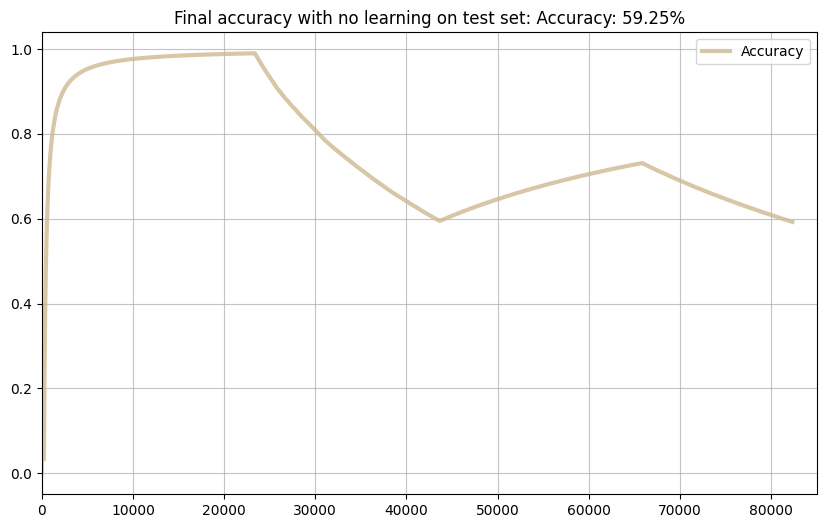

In [10]:
model = ensemble.ADWINBaggingClassifier(
    model=(
        preprocessing.StandardScaler() |
        linear_model.LogisticRegression()
    ),
    n_models=3,
    seed=42
)

evaluate_model_learn_test(model)
evaluate_model_no_learn_test(model)